##      <center>**ASIGNACIÓN #2 EDA</center>**
#####  <center>Daniel Hernández</center>

<div style="text-align: justify;">
Para esta asignacion, importaremos las librerías de Python necesarias, para luego importar el dataset <b><a href="https://www.kaggle.com/datasets/rabieelkharoua/predict-restaurant-menu-items-profitability">Predict Restaurant Menu Items Profitability</a></b>
</div>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/home/danielhz19/Documents/VSCode/UCV/ELECTIVAS/DM/data/restaurant_menu_optimization_data.csv')
df = pd.DataFrame(data)
df

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


<div style="text-align: justify;">
Como primer paso, se hará un pre-procesamiento en la columna 'Ingridients' de forma que eliminemos los caracteres innecesarios. Además de ordenar el data frame por la variable 'RestaurantID' y por último, agregar una nueva columna con una codificación numérica para 'Profitability'.
</div>

In [8]:
#   Se eliminan los caracteres innecesarios dentro de los valores de la columna 'Ingredients'
df['Ingredients'] = df['Ingredients'].str.replace('[', '')
df['Ingredients'] = df['Ingredients'].str.replace(']', '')
df['Ingredients'] = df['Ingredients'].str.replace("'", "")

#   Se ordena el data frame por el ID del Restaurante
df = df.sort_values(by = 'RestaurantID')

#   Se agrega una nueva columna con la codificación de la variable 'Profitability'
prof_code_map = {'Low':0, 'Medium':1, 'High':2}
df['ProfitabilityCode'] = df['Profitability'].map(prof_code_map)

df

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability,ProfitabilityCode
499,R001,Desserts,New York Cheesecake,"Chocolate, Butter, Sugar, Eggs",10.82,Medium,1
546,R001,Main Course,Vegetable Stir-Fry,"Chicken, Fettuccine, Alfredo Sauce, Parmesan",25.15,High,2
568,R001,Appetizers,Spinach Artichoke Dip,"Tomatoes, Basil, Garlic, Olive Oil",11.02,Medium,1
565,R001,Main Course,Vegetable Stir-Fry,"Chicken, Fettuccine, Alfredo Sauce, Parmesan",23.70,High,2
564,R001,Appetizers,Caprese Salad,"Tomatoes, Basil, Garlic, Olive Oil",8.76,Medium,1
...,...,...,...,...,...,...,...
433,R003,Appetizers,Spinach Artichoke Dip,"Tomatoes, Basil, Garlic, Olive Oil",14.73,High,2
436,R003,Desserts,Tiramisu,"Chocolate, Butter, Sugar, Eggs",18.18,High,2
465,R003,Desserts,Tiramisu,"Chocolate, Butter, Sugar, Eggs",15.30,Medium,1
112,R003,Appetizers,Stuffed Mushrooms,"Tomatoes, Basil, Garlic, Olive Oil",9.90,Medium,1


<div style="text-align: justify;">
Como primer análisis podemos comprobar si las variables 'Price' y 'Profitability' se encuentran relacionadas. Para esto calculamos el coeficiente de correlación además de realizar un gráfico que nos permita visualizar el comportamiento de ambas.
</div>

In [10]:
#   Valor del coeficiente de correlación entre ambas variables
df['Price'].corr(df['ProfitabilityCode'])

0.6203040440507466

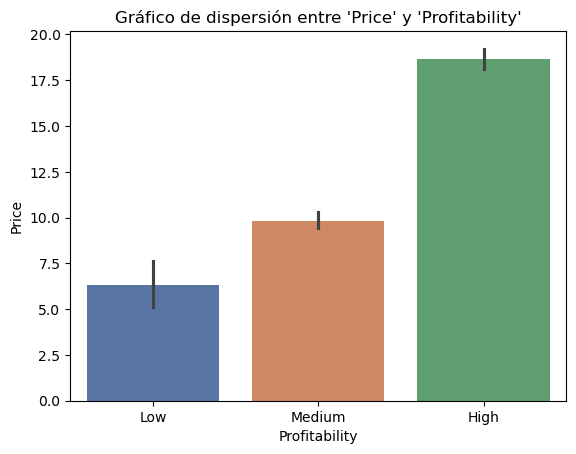

In [26]:
sns.barplot(
    x = 'Profitability',
    y = 'Price',
    data = df.sort_values(by = 'ProfitabilityCode'),
    hue = 'Profitability',
    legend = False,
    palette = "deep"
)

plt.title("Gráfico de dispersión entre 'Price' y 'Profitability'")
plt.xlabel("Profitability")
plt.ylabel("Price")

plt.show()


<div style="text-align: justify;">
Con este valor obtenido, se puede inferir una correlación positiva, lo que nos indica que a mayor calidad de comida mayor tiende a ser su precio.
</div>

<div style="text-align: justify;">
Para una siguiente observación, podemos calcular la relación calidad-precio para cada restaurante 
</div>